# MultiState Charts



In [1]:
import pandas as pd
import numpy as np
import pandas_gbq
import geopandas as gdp
from plotnine import *
from mizani.formatters import percent_format, currency_format

import statsmodels.api as sm


## Blue Logo


In [13]:
logo_file = '/Users/sarah/Documents/GitHub/TCC/team-set-up/all blue logo-03-small.png'


## MultiState Data

In [57]:
df = pd.DataFrame({'State':['Maryland', 'Michigan', 'Colorado', 'New York', 'Ohio', 'Pennsylvania', 'Arizona', 'New Hampshire'],
                   '18_yo_registration_dates':[.64, .63, .69, .40, .32, .27, .25, .09],
                   'as_of_dates':["Dec 2023", "May 2024", "Sept 2023", "May 2024",
                                  "May 2024", "May 2024", "April 2024", "Dec 2023"],
                   })
df

,State,18_yo_registration_dates,as_of_dates
0,Maryland,0.64,Dec 2023
1,Michigan,0.63,May 2024
2,Colorado,0.69,Sept 2023
3,New York,0.40,May 2024
4,Ohio,0.32,May 2024
5,Pennsylvania,0.27,May 2024
6,Arizona,0.25,April 2024
7,New Hampshire,0.09,Dec 2023


## Settings


In [58]:
bgcolor = '#f1f7ff'
textcolor = '#170c66'
linecolor = '#D5D5D5'
highlightcolor = '#ffe047'

### Bar Chart 

In [59]:
df_chart = df.copy()
df_chart['data_label'] = round(df_chart['18_yo_registration_dates'] *100,1).astype(int).astype(str) + "%"
df_chart['x_label'] = df_chart.State + "\n(" + df_chart.as_of_dates +")"
df_chart

,State,18_yo_registration_dates,as_of_dates,data_label,x_label
0,Maryland,0.64,Dec 2023,64%,Maryland\n(Dec 2023)
1,Michigan,0.63,May 2024,63%,Michigan\n(May 2024)
2,Colorado,0.69,Sept 2023,69%,Colorado\n(Sept 2023)
3,New York,0.40,May 2024,40%,New York\n(May 2024)
4,Ohio,0.32,May 2024,32%,Ohio\n(May 2024)
5,Pennsylvania,0.27,May 2024,27%,Pennsylvania\n(May 2024)
6,Arizona,0.25,April 2024,25%,Arizona\n(April 2024)
7,New Hampshire,0.09,Dec 2023,9%,New Hampshire\n(Dec 2023)


In [88]:
state_list = df_chart.sort_values('18_yo_registration_dates', ascending=False).x_label.tolist()

state_cat = pd.Categorical(df_chart["x_label"], categories=state_list)

df_chart = df_chart.assign(x_label=state_cat)
df_chart = df_chart[df_chart.State != "Maryland"]

df_chart['color_highlight'] = np.where(df_chart.State=='Pennsylvania','1','0')
df_chart['text_color'] = np.where(df_chart.State=='Pennsylvania','1','0')


sources ='US Census, Colorado Secretary of State, Michigan voter file, New York voter file,\nOhio voter file, Pennsylvania voter file, Arizona voter file, New Hampshire Secretary of State'

title: Multi-State 18-yo Voter Registration Rates 2023 and 2024


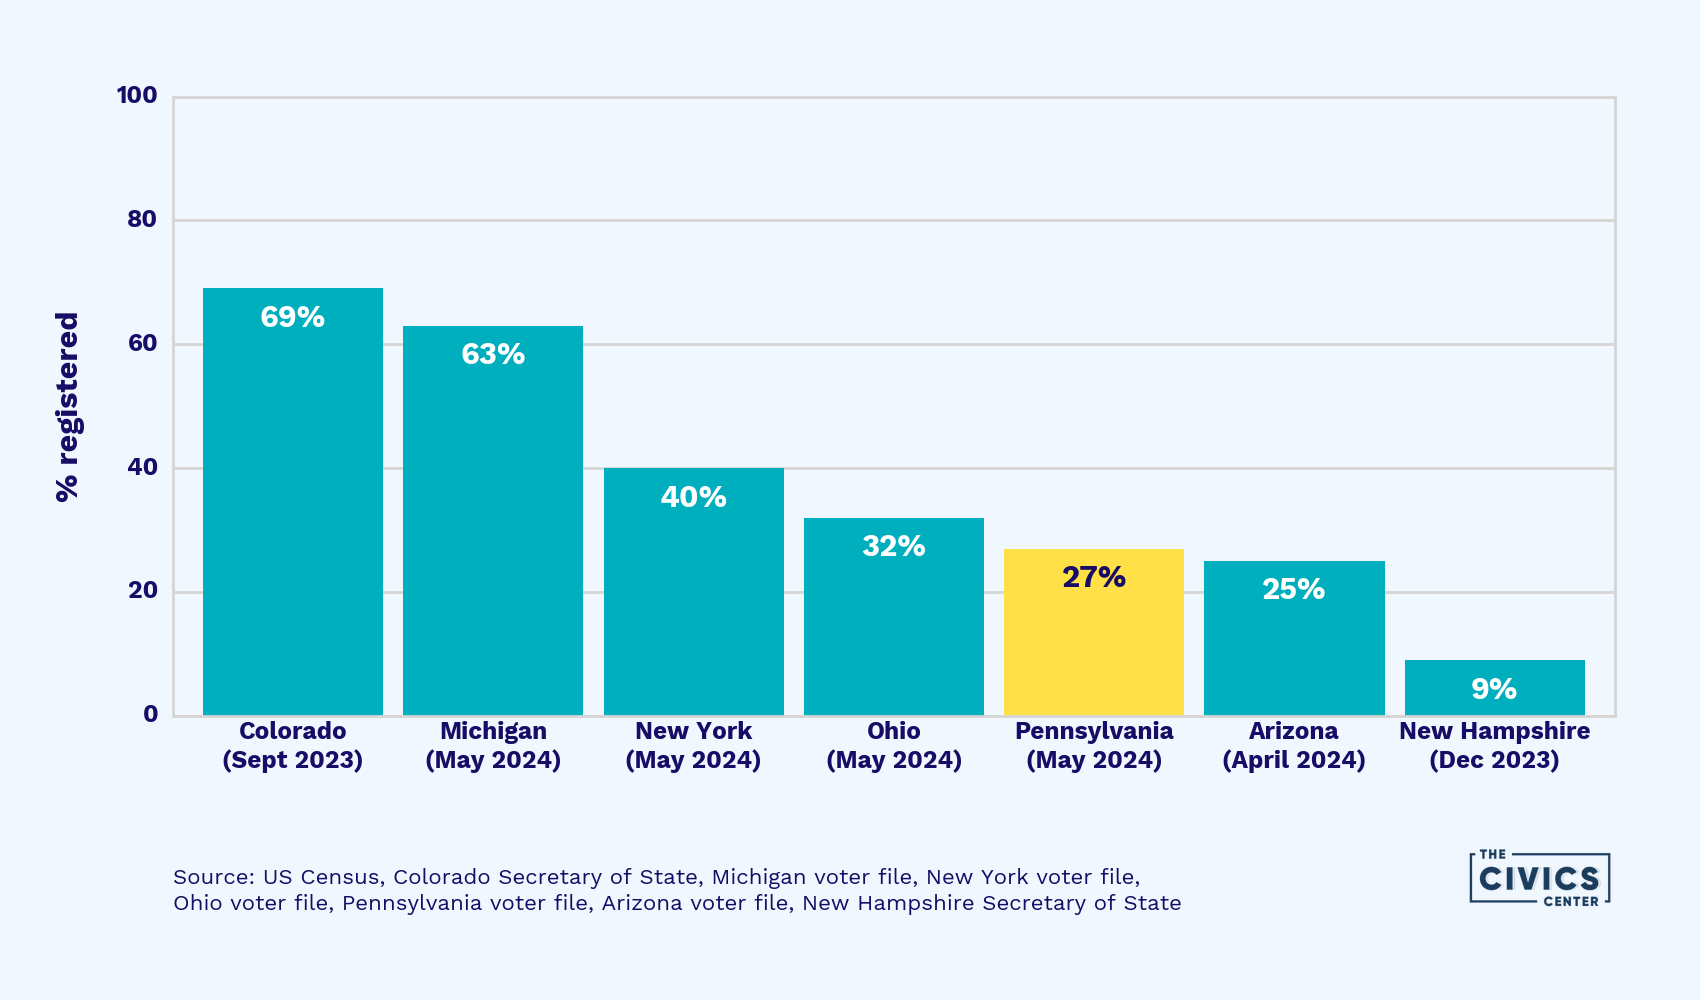

In [93]:
print("title: Multi-State 18-yo Voter Registration Rates 2023 and 2024")
(
    ggplot(df_chart, aes(x='x_label', y='18_yo_registration_dates', label='data_label', fill='color_highlight'))
    + geom_bar(stat='identity', show_legend=False)
    + scale_fill_manual(['#00afbe', highlightcolor])
    + geom_text(aes(color='text_color'), position=position_nudge(x=0, y=-.05),fontweight='bold', show_legend=False)
    + scale_color_manual(['white', textcolor])
    + scale_y_continuous(labels=percent_format(suffix=""), limits=[0,1], breaks=[0,.20,.40,.60,.80,1], expand=(0, 0.0))
    + labs (x="", y = "% registered", title ='', caption="Source: " + sources)
    + theme(text=element_text(family="Work Sans", face='bold', color=textcolor), 
            # axis_title=element_text(face='bold'),
            axis_ticks=element_blank(),
            panel_background=element_rect(fill=bgcolor),
            panel_border=element_rect(fill="none", color=linecolor, size=1),
            panel_grid_major_y=element_line(color="#D5D5D5"),
            panel_grid_minor_y=element_blank(),
            panel_grid_major_x=element_blank(),
            panel_grid_minor_x=element_blank(),
            plot_background=element_rect(fill=bgcolor, color=bgcolor, size=1),
            strip_background=element_rect(size=2),
            axis_text_x=element_text(ha='center', va='center', color=textcolor, y = -0.05, linespacing=1.3), 
            axis_text_y=element_text(ha='right', va='center', color=textcolor, x = -0.01),
            axis_title_y=element_text(ha='right', va='center', color=textcolor, x = -0.01),
            plot_margin_left=.05,
            plot_margin_right=.05,
            plot_margin_top=.05,
            plot_margin_bottom=.05,
            plot_title=element_text(hjust=0, vjust=.8),
            plot_subtitle=element_text(vjust=.8),
            plot_caption=element_text(weight='normal', hjust=0,
                                      size=8,
                                      linespacing=1.3,
                                      margin= {'t':.5, 'b':0, 'l':0, 'r':0, 'units':'inches'}),
            figure_size=(8.5, 5)
            )
    + watermark(logo_file, xo=1465, yo=90 )
)



## Multi-City Data

In [4]:
df = pd.DataFrame({'City':['Detroit', 'Denver', 'Baltimore', 'Pittsburgh', 'Tucson', 'Cincinnati', 'New York City', 'Cleveland', 'Philadelphia', 'Phoenix'],
                   '18_yo_registration_dates':[.61, .67, .47, .40, .31, .29, .28, .27, .25, .15],
                   'as_of_dates':["May 2024", "Sept 2023", "Dec 2023", "May 2024",
                                  "April 2024", "May 2024", "May 2024", "May 2024", "May 2024", "April 2024"],
                   })
df

,City,18_yo_registration_dates,as_of_dates
0,Detroit,0.61,May 2024
1,Denver,0.67,Sept 2023
2,Baltimore,0.47,Dec 2023
3,Pittsburgh,0.40,May 2024
4,Tucson,0.31,April 2024
5,Cincinnati,0.29,May 2024
6,New York City,0.28,May 2024
7,Cleveland,0.27,May 2024
8,Philadelphia,0.25,May 2024
9,Phoenix,0.15,April 2024


## Settings


In [5]:
bgcolor = '#f1f7ff'
textcolor = '#170c66'
linecolor = '#D5D5D5'
highlightcolor = '#ffe047'

### Bar Chart 

In [9]:
df_chart = df.copy()
df_chart['data_label'] = round(df_chart['18_yo_registration_dates'] *100,1).astype(int).astype(str) + "%"
df_chart['x_label'] = df_chart.City + "\n(" + df_chart.as_of_dates +")"
df_chart

,City,18_yo_registration_dates,as_of_dates,data_label,x_label
0,Detroit,0.61,May 2024,61%,Detroit\n(May 2024)
1,Denver,0.67,Sept 2023,67%,Denver\n(Sept 2023)
2,Baltimore,0.47,Dec 2023,47%,Baltimore\n(Dec 2023)
3,Pittsburgh,0.40,May 2024,40%,Pittsburgh\n(May 2024)
4,Tucson,0.31,April 2024,31%,Tucson\n(April 2024)
5,Cincinnati,0.29,May 2024,29%,Cincinnati\n(May 2024)
6,New York City,0.28,May 2024,28%,New York City\n(May 2024)
7,Cleveland,0.27,May 2024,27%,Cleveland\n(May 2024)
8,Philadelphia,0.25,May 2024,25%,Philadelphia\n(May 2024)
9,Phoenix,0.15,April 2024,15%,Phoenix\n(April 2024)


In [11]:
state_list = df_chart.sort_values('18_yo_registration_dates', ascending=False).x_label.tolist()

state_cat = pd.Categorical(df_chart["x_label"], categories=state_list)

df_chart = df_chart.assign(x_label=state_cat)
df_chart = df_chart[df_chart.City != "Baltimore"]

df_chart['color_highlight'] = np.where(df_chart.City.isin(['Pittsburgh', 'Philadelphia']),'1','0')
df_chart['text_color'] = np.where(df_chart.City.isin(['Pittsburgh', 'Philadelphia']),'1','0')


sources ='US Census, Colorado Secretary of State, Michigan voter file, New York voter file,\nOhio voter file, Pennsylvania voter file, Arizona voter file, New Hampshire Secretary of State'

title: Multi-State 18-yo Voter Registration Rates 2023 and 2024


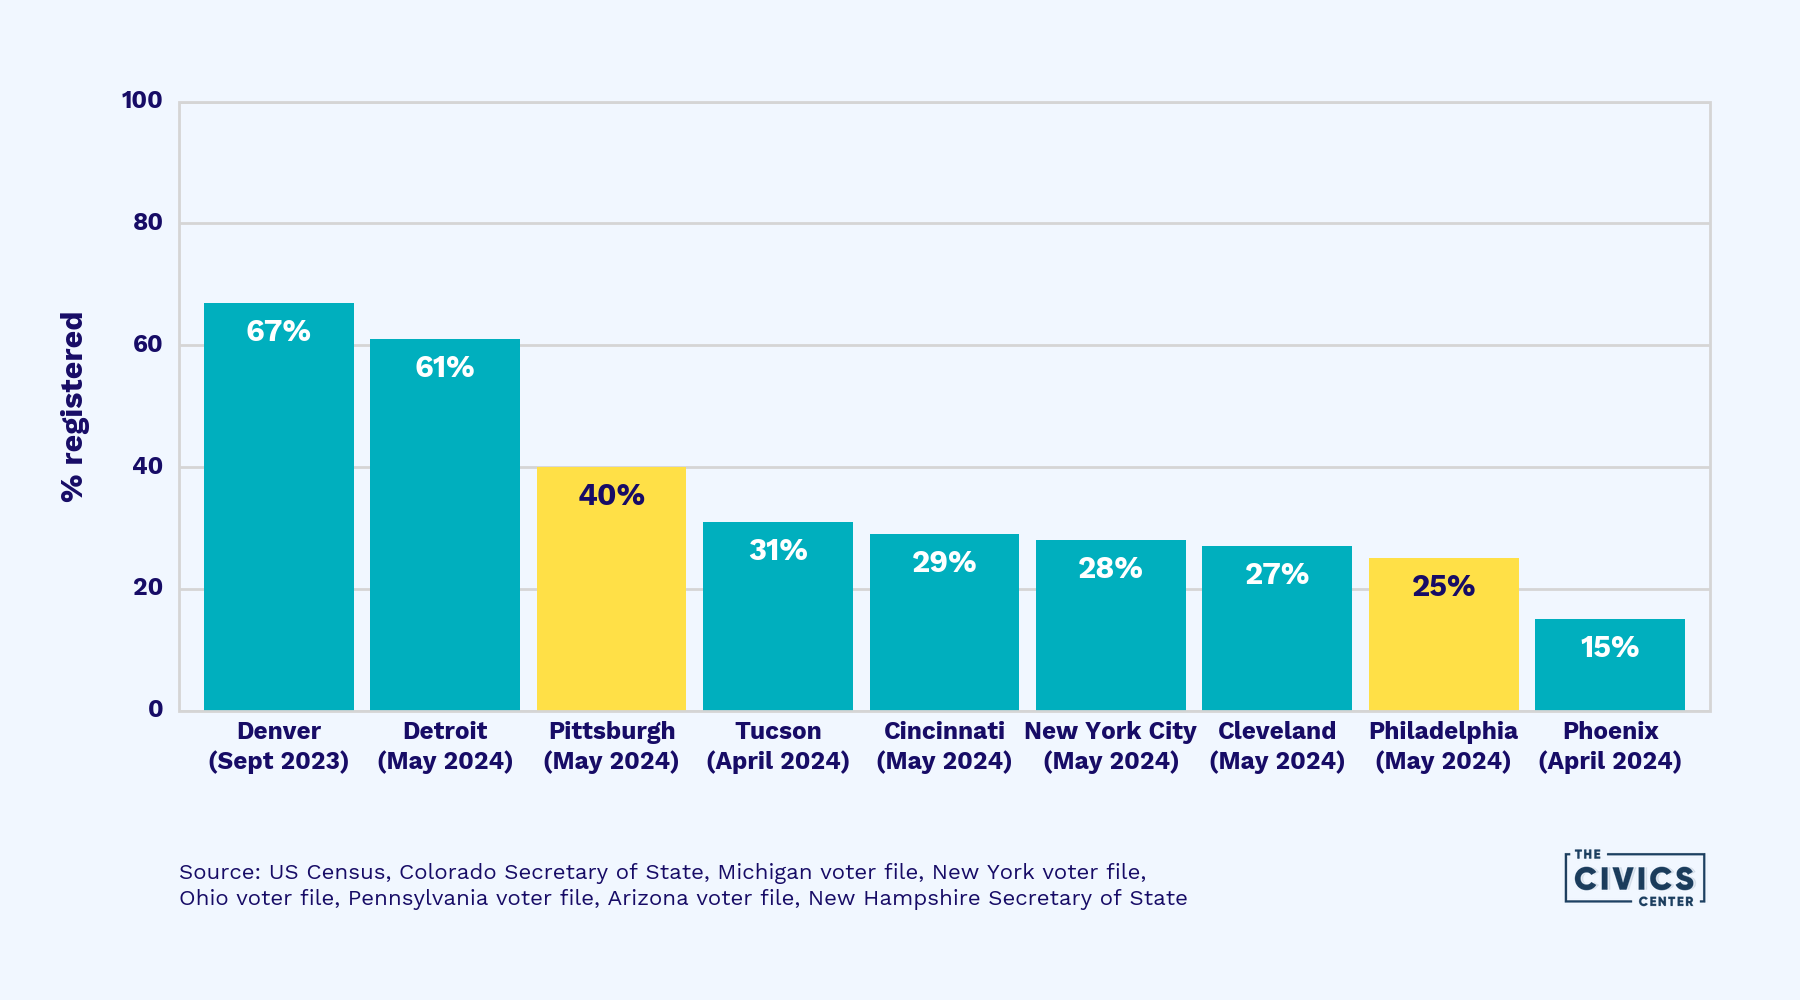

In [19]:
print("title: Multi-City 18-yo Voter Registration Rates 2023 and 2024")
(
    ggplot(df_chart, aes(x='x_label', y='18_yo_registration_dates', label='data_label', fill='color_highlight'))
    + geom_bar(stat='identity', show_legend=False)
    + scale_fill_manual(['#00afbe', highlightcolor])
    + geom_text(aes(color='text_color'), position=position_nudge(x=0, y=-.05),fontweight='bold', show_legend=False)
    + scale_color_manual(['white', textcolor])
    + scale_y_continuous(labels=percent_format(suffix=""), limits=[0,1], breaks=[0,.20,.40,.60,.80,1], expand=(0, 0.0))
    + labs (x="", y = "% registered", title ='', caption="Source: " + sources)
    + theme(text=element_text(family="Work Sans", face='bold', color=textcolor), 
            # axis_title=element_text(face='bold'),
            axis_ticks=element_blank(),
            panel_background=element_rect(fill=bgcolor),
            panel_border=element_rect(fill="none", color=linecolor, size=1),
            panel_grid_major_y=element_line(color="#D5D5D5"),
            panel_grid_minor_y=element_blank(),
            panel_grid_major_x=element_blank(),
            panel_grid_minor_x=element_blank(),
            plot_background=element_rect(fill=bgcolor, color=bgcolor, size=1),
            strip_background=element_rect(size=2),
            axis_text_x=element_text(ha='center', va='center', color=textcolor, y = -0.06, linespacing=1.3), 
            axis_text_y=element_text(ha='right', va='center', color=textcolor, x = -0.01),
            axis_title_y=element_text(ha='right', va='center', color=textcolor, x = -0.01),
            plot_margin_left=.05,
            plot_margin_right=.05,
            plot_margin_top=.05,
            plot_margin_bottom=.05,
            plot_title=element_text(hjust=0, vjust=.8),
            plot_subtitle=element_text(vjust=.8),
            plot_caption=element_text(weight='normal', hjust=0,
                                      size=8,
                                      linespacing=1.3,
                                      margin= {'t':.5, 'b':0, 'l':0, 'r':0, 'units':'inches'}),
            figure_size=(9, 5)
            )
    + watermark(logo_file, xo=1560, yo=90 )
)

